In [3]:
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakShapedNet
from nodes.layer import ShapedLayer

import random
import matplotlib.pyplot as plt

random.seed(42)

inputlayer = ShapedLayer((8,8))
foldiaklayer = ShapedLayer(16)

foldiaklayer.fillnodes(FoldiakNode)
inputlayer.fillnodes(InputNode)
    
network = FoldiakShapedNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_foldiak(inputlayer, foldiaklayer)

network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)
network.setparam("p",1.0/8)
network.setparam("l",10)
network.setparam("intmethod","BDF")
network.setparam("dt",0.1)
network.setparam("tnum",100)

In [2]:
network.setparam("intmethod","BDF")
network.setparam("dt",0.1)
network.setparam("tnum",100)
network.setup()
for i in inputlayer.nodes:
    i.setvalstored(random.uniform(0,1))

network.update()
network.update()

import time
deltas = []

for i in range(200):
    t0 = time.clock()
    network.update()
    t1 = time.clock()
    deltas.append(t1-t0)
print(sum(deltas)/len(deltas))

0.023468572999999996


In [4]:
import numpy as np
samples = np.loadtxt("../data/lines_noisy.csv")

network.setup()

In [5]:
#Steady state thres:
network.setparam("a",0.0)
network.setparam("b",0.0)
network.setparam("y",0.5)
for i in range(200):
    for i in inputlayer.nodes:
        i.setvalstored(random.uniform(0,1))
    network.update()

In [6]:
network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)

outnum = 5000
innum = 1
count = 0

for i in range(outnum):
    for j in range(len(inputlayer.nodes)):
        inputlayer.nodes[j].setvalstored(samples[i,j])
    for j in range(innum):
        network.update()
    count += innum
    if ((count%1000)==0):
        print(str(count)+"/"+str(innum*outnum))

1000/5000
2000/5000
3000/5000
4000/5000
5000/5000


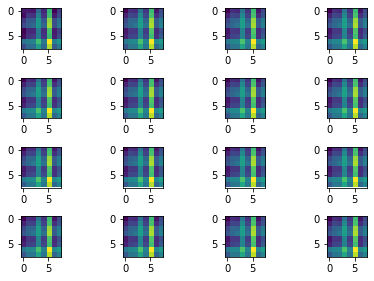

In [24]:
fig=plt.figure()

for node_num in range(len(foldiaklayer.nodes)):
    testbias = []
    connects = np.reshape(network.cgroups[0].npconnects, -1)
    for node in inputlayer.nodes:
        for i in connects:
            if (i.input is node) and (i.output is foldiaklayer.nodes[node_num]):
                testbias.append(i.bias)
    fig.add_subplot(4,4,node_num+1)
            
    plt.imshow(np.array(testbias).reshape((8,8)))
fig.tight_layout()
#plt.savefig("2020_07_07_bias_figure.png")
plt.show()

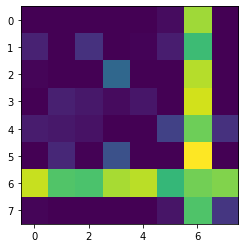

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
samplenum = 30
plt.imshow(samples[samplenum,:].reshape((8,8)))
#plt.savefig("2020_07_07_sample_ex.png")
plt.show()
for i in range(8*8):
    inputlayer.nodes[i].setvalstored(samples[samplenum,i])
network.update()
output = []
for i in foldiaklayer.nodes:
    output.append(i.returnval())
output

In [9]:
foldiaklayer.returnshapedthres()

array([0.078, 0.078, 0.078, 0.078, 0.078, 0.078, 0.078, 0.078, 0.078,
       0.078, 0.078, 0.078, 0.078, 0.078, 0.078, 0.078])

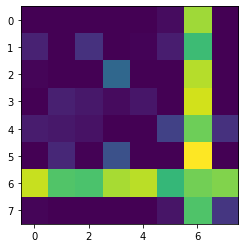

In [10]:
plt.imshow(inputlayer.returnshapedvals())

In [12]:
hcs = network.cgroups[0].npconnects
hcs.shape

(64, 16)

In [13]:
hcs[2,2].bias

0.0734634310903934

In [14]:
ahcs = network.cgroups[1].npconnects
ahcs.shape

(16, 16)

In [15]:
ahcs[0,5].bias

-4.214687500000122

In [20]:
hcs[2,0].bias

0.07279884787331553

In [13]:
for i in range(200):
    network.update()

In [25]:
ode1 = network.diffeqs[0]

In [26]:
ode1.getxsum()

array([1.37238313, 1.37101954, 1.37337753, 1.37328867, 1.37377774,
       1.37391873, 1.3725841 , 1.37379907, 1.37415575, 1.37436688,
       1.37327958, 1.37288816, 1.37397562, 1.37230003, 1.37192915,
       1.37373493])

In [27]:
ode1.qs.input.returnvals()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02549882, 0.67308184, 0.        , 0.07422102, 0.        ,
       0.11168013, 0.        , 0.00912673, 0.063199  , 0.53955178,
       0.        , 0.01189012, 0.        , 0.        , 0.26197707,
       0.        , 0.        , 0.69882088, 0.        , 0.        ,
       0.0692486 , 0.05138262, 0.02388783, 0.04882099, 0.        ,
       0.73361131, 0.        , 0.06057727, 0.05218865, 0.03712566,
       0.        , 0.        , 0.15202092, 0.61415993, 0.1118156 ,
       0.        , 0.08752689, 0.00520684, 0.19454071, 0.        ,
       0.        , 0.78651037, 0.        , 0.7219019 , 0.5725052 ,
       0.56238288, 0.6850365 , 0.70405158, 0.52498874, 0.61878864,
       0.63812121, 0.01164501, 0.        , 0.        , 0.        ,
       0.        , 0.04417138, 0.57041828, 0.12320284])

In [30]:
ode1.qs.getbiases()

array([[0.07397537, 0.05141453, 0.05280859, ..., 0.05267589, 0.05233841,
        0.05310036],
       [0.07700911, 0.07749285, 0.07712505, ..., 0.07715499, 0.07668261,
        0.07669194],
       [0.07279885, 0.0739668 , 0.07346343, ..., 0.07368661, 0.0727327 ,
        0.07238921],
       ...,
       [0.21076512, 0.2114944 , 0.21135948, ..., 0.21122618, 0.21239372,
        0.21158435],
       [0.11140536, 0.11052244, 0.1115734 , ..., 0.1105153 , 0.11109376,
        0.11150945],
       [0.13140406, 0.13274758, 0.13125493, ..., 0.13175454, 0.13229823,
        0.13244638]])